In [1]:
import io
import warnings

import cairosvg
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.colors import to_rgb
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

warnings.filterwarnings("ignore")

In [2]:
pd.ExcelFile("../../../data/final_paper.xlsx").sheet_names

['TRAIN-DS-DIELECTRIC',
 'TRAIN-DS-EMLE-SPECIES',
 'TRAIN-DS-MMVACUUMME',
 'TEST-DS-MMVACUUMME',
 'TEST-DS-EMLE-SPECIES']

In [3]:
df_mace_small_emle = pd.read_excel(
    "../../../data/final_paper.xlsx",
    sheet_name="TEST-DS-EMLE-SPECIES",
    header=1,
    nrows=6,
)


df_mace_medium_emle = pd.read_excel(
    "../../../data/final_paper.xlsx",
    sheet_name="TEST-DS-EMLE-SPECIES",
    skiprows=8,
    nrows=6,
)

df_ani_emle = pd.read_excel(
    "../../../data/final_paper.xlsx",
    sheet_name="TEST-DS-EMLE-SPECIES",
    skiprows=15,
    nrows=6,
)

In [4]:
df_mace_small = pd.read_excel(
    "../../../data/final_paper.xlsx",
    sheet_name="TEST-DS-MMVACUUMME",
    header=1,
    nrows=6,
)

df_mace_medium = pd.read_excel(
    "../../../data/final_paper.xlsx",
    sheet_name="TEST-DS-MMVACUUMME",
    skiprows=8,
    nrows=6,
)

df_ani = pd.read_excel(
    "../../../data/final_paper.xlsx",
    sheet_name="TEST-DS-MMVACUUMME",
    skiprows=15,
    nrows=6,
)

In [5]:
# Define the datasets
VACUUM_COLS = ["Vacuum-Rep1", "Vacuum-Rep2", "Vacuum-Rep3"]
MM_COLS = ["MM-Rep1", "MM-Rep2", "MM-Rep3"]
ME_COLS = ["ME-Rep1", "ME-Rep2", "ME-Rep3"]
EMLE_COLS = [
    "Patched-Iter2-Species (0.7)",
    "Patched-Iter2-Species (0.7).1",
    "Patched-Iter2-Species (0.7).2",
]

# According to https://github.com/MobleyLab/FreeSolv/blob/master/database.txt
EXP_MEAN = [
    -20.52,
    -11.85,
    -4.68,
    -13.43,
    -23.62,
    -12.64,
]

EXP_STD = [
    0.27,
    0.35,
    0.10,
    1.00,
    0.32,
    0.74,
]

# Get the data for each dataset
MM = df_mace_small[MM_COLS]
VACUUM_MACE_SMALL = df_mace_small[VACUUM_COLS]
ME_MACE_SMALL = df_mace_small[ME_COLS]
VACUUM_MACE_MEDIUM = df_mace_medium[VACUUM_COLS]
ME_MACE_MEDIUM = df_mace_medium[ME_COLS]
VACUUM_ANI = df_ani[VACUUM_COLS]
ME_ANI = df_ani[ME_COLS]

EFF_07_MACE_SMALL = df_mace_small_emle[EMLE_COLS]
EFF_07_MACE_MEDIUM = df_mace_medium_emle[EMLE_COLS]
EFF_07_ANI = df_ani_emle[EMLE_COLS]

In [6]:
# Create EXP dataframe
EXP = pd.DataFrame(
    {
        "EXP1": EXP_MEAN,
        "EXP2": EXP_MEAN,
        "EXP3": EXP_MEAN,
    }
)

In [7]:
# dG
dG_MM = MM.values
dG_ME_ANI = MM.values + ME_ANI.values - VACUUM_ANI.values
dG_ME_MACE_SMALL = MM.values + ME_MACE_SMALL.values - VACUUM_MACE_SMALL.values
dG_ME_MACE_MEDIUM = MM.values + ME_MACE_MEDIUM.values - VACUUM_MACE_MEDIUM.values
dG_EFF_07_ANI = MM.values + EFF_07_ANI.values - VACUUM_ANI.values
dG_EFF_07_MACE_SMALL = MM.values + EFF_07_MACE_SMALL.values - VACUUM_MACE_SMALL.values
dG_EFF_07_MACE_MEDIUM = (
    MM.values + EFF_07_MACE_MEDIUM.values - VACUUM_MACE_MEDIUM.values
)

# Absolute error of dG
dG_MM_ABS_ERROR = dG_MM - EXP.values
rmse_MM = np.sqrt(np.mean((dG_MM_ABS_ERROR) ** 2))
dG_MM_ABS_ERROR = pd.DataFrame(dG_MM_ABS_ERROR, index=EXP.index, columns=EXP.columns)

dG_ME_ANI_ABS_ERROR = dG_ME_ANI - EXP.values
rmse_ME_ANI = np.sqrt(np.mean((dG_ME_ANI_ABS_ERROR) ** 2))
dG_ME_ANI_ABS_ERROR = pd.DataFrame(
    dG_ME_ANI_ABS_ERROR, index=EXP.index, columns=EXP.columns
)

dG_ME_MACE_SMALL_ABS_ERROR = dG_ME_MACE_SMALL - EXP.values
rmse_ME_MACE_SMALL = np.sqrt(np.mean((dG_ME_MACE_SMALL_ABS_ERROR) ** 2))
dG_ME_MACE_SMALL_ABS_ERROR = pd.DataFrame(
    dG_ME_MACE_SMALL_ABS_ERROR, index=EXP.index, columns=EXP.columns
)

dG_ME_MACE_MEDIUM_ABS_ERROR = dG_ME_MACE_MEDIUM - EXP.values
rmse_ME_MACE_MEDIUM = np.sqrt(np.mean((dG_ME_MACE_MEDIUM_ABS_ERROR) ** 2))
dG_ME_MACE_MEDIUM_ABS_ERROR = pd.DataFrame(
    dG_ME_MACE_MEDIUM_ABS_ERROR, index=EXP.index, columns=EXP.columns
)

dG_EFF_07_ANI_ABS_ERROR = dG_EFF_07_ANI - EXP.values
rmse_EFF_07_ANI = np.sqrt(np.mean((dG_EFF_07_ANI_ABS_ERROR) ** 2))
dG_EFF_07_ANI_ABS_ERROR = pd.DataFrame(
    dG_EFF_07_ANI_ABS_ERROR, index=EXP.index, columns=EXP.columns
)

dG_EFF_07_MACE_SMALL_ABS_ERROR = dG_EFF_07_MACE_SMALL - EXP.values
rmse_EFF_07_MACE_SMALL = np.sqrt(np.mean((dG_EFF_07_MACE_SMALL_ABS_ERROR) ** 2))
dG_EFF_07_MACE_SMALL_ABS_ERROR = pd.DataFrame(
    dG_EFF_07_MACE_SMALL_ABS_ERROR, index=EXP.index, columns=EXP.columns
)

dG_EFF_07_MACE_MEDIUM_ABS_ERROR = dG_EFF_07_MACE_MEDIUM - EXP.values
rmse_EFF_07_MACE_MEDIUM = np.sqrt(np.mean((dG_EFF_07_MACE_MEDIUM_ABS_ERROR) ** 2))
dG_EFF_07_MACE_MEDIUM_ABS_ERROR = pd.DataFrame(
    dG_EFF_07_MACE_MEDIUM_ABS_ERROR, index=EXP.index, columns=EXP.columns
)

# Uncertainty
dG_MM_ABS_ERROR_STD = dG_MM_ABS_ERROR.std(axis=1)
dG_ME_ANI_ABS_ERROR_STD = dG_ME_ANI_ABS_ERROR.std(axis=1)
dG_ME_MACE_SMALL_ABS_ERROR_STD = dG_ME_MACE_SMALL_ABS_ERROR.std(axis=1)
dG_ME_MACE_MEDIUM_ABS_ERROR_STD = dG_ME_MACE_MEDIUM_ABS_ERROR.std(axis=1)
dG_EFF_07_ANI_ABS_ERROR_STD = dG_EFF_07_ANI_ABS_ERROR.std(axis=1)
dG_EFF_07_MACE_SMALL_ABS_ERROR_STD = dG_EFF_07_MACE_SMALL_ABS_ERROR.std(axis=1)
dG_EFF_07_MACE_MEDIUM_ABS_ERROR_STD = dG_EFF_07_MACE_MEDIUM_ABS_ERROR.std(axis=1)

# Sample std error : t_student_coeff * std / sqrt(3)
# STD ERROR OF THE ABSOLUTE ERROR
t_student_coeff = 1
dG_MM_ABS_ERROR_ERROR = t_student_coeff * dG_MM_ABS_ERROR_STD / np.sqrt(3)
dG_ME_ANI_ABS_ERROR_ERROR = t_student_coeff * dG_ME_ANI_ABS_ERROR_STD / np.sqrt(3)
dG_ME_MACE_SMALL_ABS_ERROR_ERROR = (
    t_student_coeff * dG_ME_MACE_SMALL_ABS_ERROR_STD / np.sqrt(3)
)
dG_ME_MACE_MEDIUM_ABS_ERROR_ERROR = (
    t_student_coeff * dG_ME_MACE_MEDIUM_ABS_ERROR_STD / np.sqrt(3)
)
dG_EFF_07_ANI_ABS_ERROR_ERROR = (
    t_student_coeff * dG_EFF_07_ANI_ABS_ERROR_STD / np.sqrt(3)
)
dG_EFF_07_MACE_SMALL_ABS_ERROR_ERROR = (
    t_student_coeff * dG_EFF_07_MACE_SMALL_ABS_ERROR_STD / np.sqrt(3)
)
dG_EFF_07_MACE_MEDIUM_ABS_ERROR_ERROR = (
    t_student_coeff * dG_EFF_07_MACE_MEDIUM_ABS_ERROR_STD / np.sqrt(3)
)

# Create a dataframe with the data
df_data_mean = pd.DataFrame(
    {
        "Molecule": df_mace_small["Molecule"],
        "OpenFF/TIP3P": dG_MM_ABS_ERROR.mean(axis=1),
        "ANI-2x (ME)": dG_ME_ANI_ABS_ERROR.mean(axis=1),
        "ANI-2x (EE)": dG_EFF_07_ANI_ABS_ERROR.mean(axis=1),
        "MACE-OFF23(S) (ME)": dG_ME_MACE_SMALL_ABS_ERROR.mean(axis=1),
        "MACE-OFF23(S) (EE)": dG_EFF_07_MACE_SMALL_ABS_ERROR.mean(axis=1),
        "MACE-OFF24(M) (ME)": dG_ME_MACE_MEDIUM_ABS_ERROR.mean(axis=1),
        "MACE-OFF24(M) (EE)": dG_EFF_07_MACE_MEDIUM_ABS_ERROR.mean(axis=1),
    }
)

df_data_std = pd.DataFrame(
    {
        "Molecule": df_mace_small["Molecule"],
        "OpenFF/TIP3P": dG_MM_ABS_ERROR_STD,
        "ANI-2x (ME)": dG_ME_ANI_ABS_ERROR_STD,
        "ANI-2x (EE)": dG_EFF_07_ANI_ABS_ERROR_STD,
        "MACE-OFF23(S) (ME)": dG_ME_MACE_SMALL_ABS_ERROR_STD,
        "MACE-OFF23(S) (EE)": dG_EFF_07_MACE_SMALL_ABS_ERROR_STD,
        "MACE-OFF24(M) (ME)": dG_ME_MACE_MEDIUM_ABS_ERROR_STD,
        "MACE-OFF24(M) (EE)": dG_EFF_07_MACE_MEDIUM_ABS_ERROR_STD,
    }
)

df_data_error = pd.DataFrame(
    {
        "Molecule": df_mace_small["Molecule"],
        "OpenFF/TIP3P": dG_MM_ABS_ERROR_ERROR,
        "ANI-2x (ME)": dG_ME_ANI_ABS_ERROR_ERROR,
        "ANI-2x (EE)": dG_EFF_07_ANI_ABS_ERROR_ERROR,
        "MACE-OFF23(S) (ME)": dG_ME_MACE_SMALL_ABS_ERROR_ERROR,
        "MACE-OFF23(S) (EE)": dG_EFF_07_MACE_SMALL_ABS_ERROR_ERROR,
        "MACE-OFF24(M) (ME)": dG_ME_MACE_MEDIUM_ABS_ERROR_ERROR,
        "MACE-OFF24(M) (EE)": dG_EFF_07_MACE_MEDIUM_ABS_ERROR_ERROR,
    }
)

In [8]:
print("RMSEs:")
print(f"OpenFF/TIP3P: {rmse_MM}")
print(f"ANI-2x (ME): {rmse_ME_ANI}")
print(f"ANI-2x (EE): {rmse_EFF_07_ANI}")
print(f"MACE-OFF23(S) (ME): {rmse_ME_MACE_SMALL}")
print(f"MACE-OFF23(S) (EE): {rmse_EFF_07_MACE_SMALL}")
print(f"MACE-OFF24(M) (ME): {rmse_ME_MACE_MEDIUM}")
print(f"MACE-OFF24(M) (EE): {rmse_EFF_07_MACE_MEDIUM}")

RMSEs:
OpenFF/TIP3P: 3.8774180143417984
ANI-2x (ME): 3.331452487783037
ANI-2x (EE): 1.0816763518855164
MACE-OFF23(S) (ME): 3.905612936551438
MACE-OFF23(S) (EE): 2.268903667661544
MACE-OFF24(M) (ME): 3.7671232425083687
MACE-OFF24(M) (EE): 2.119583609816389


In [9]:
df_long_combined = pd.merge(
    df_data_mean.melt(id_vars="Molecule", var_name="Model", value_name="Mean"),
    df_data_error.melt(id_vars="Molecule", var_name="Model", value_name="Error"),
    on=["Molecule", "Model"],
)

# Change the order so that models appear OpenFF/TIP3P, MACE (ME), MACE (EE), ANI-2x (ME), ANI-2x (EE)
df_long_combined["Model"] = pd.Categorical(
    df_long_combined["Model"],
    categories=[
        "OpenFF/TIP3P",
        "MACE-OFF23(S) (ME)",
        "MACE-OFF23(S) (EE)",
        "MACE-OFF24(M) (ME)",
        "MACE-OFF24(M) (EE)",
        "ANI-2x (ME)",
        "ANI-2x (EE)",
    ],
    ordered=True,
)

# Chang names
df_long_combined["Model"] = df_long_combined["Model"].replace(
    {
        "OpenFF/TIP3P": "OpenFF/TIP3P",
        "MACE-OFF23(S) (ME)": "MACE-OFF23(S)/MM",
        "MACE-OFF23(S) (EE)": "MACE-OFF23(S)/EMLE/MM",
        "MACE-OFF24(M) (ME)": "MACE-OFF24(M)/MM",
        "MACE-OFF24(M) (EE)": "MACE-OFF24(M)/EMLE/MM",
        "ANI-2x (ME)": "ANI-2x/MM",
        "ANI-2x (EE)": "ANI-2x/EMLE/MM",
    }
)

df_long_combined

# Sort by molecule
df_long_combined = df_long_combined.sort_values(by=["Model", "Molecule"])
df_long_combined

,Molecule,Model,Mean,Error
0,1896013,OpenFF/TIP3P,4.372789,0.060086
1,242480,OpenFF/TIP3P,-3.487208,0.073346
2,2850833,OpenFF/TIP3P,-4.806366,0.049739
3,3259411,OpenFF/TIP3P,2.085457,0.031177
4,4587267,OpenFF/TIP3P,3.489716,0.153107
5,caffeine,OpenFF/TIP3P,-4.384474,0.016722
18,1896013,MACE-OFF23(S)/MM,-3.682317,0.203582
19,242480,MACE-OFF23(S)/MM,-3.949690,0.057888
20,2850833,MACE-OFF23(S)/MM,-4.436243,0.147388
21,3259411,MACE-OFF23(S)/MM,-0.393511,0.071457


In [10]:
def lighten_color(color, amount=0.5):
    """
    Lightens the given color by blending with white.
    amount=0 -> original color, amount=1 -> white
    """
    c = to_rgb(color)
    white = (1, 1, 1)
    new_color = tuple((1 - amount) * ci + amount * wi for ci, wi in zip(c, white))
    return new_color


# Base colorblind palette
cb_colors = sns.color_palette("colorblind")

# Assign colors
palette = {
    "OpenFF/TIP3P": cb_colors[0],
    "MACE-OFF23(S)/MM": cb_colors[1],
    "MACE-OFF23(S)/EMLE/MM": lighten_color(cb_colors[1], 0.5),
    "MACE-OFF24(M)/MM": cb_colors[2],
    "MACE-OFF24(M)/EMLE/MM": lighten_color(cb_colors[2], 0.5),
    "ANI-2x/MM": cb_colors[3],
    "ANI-2x/EMLE/MM": lighten_color(cb_colors[3], 0.5),
}

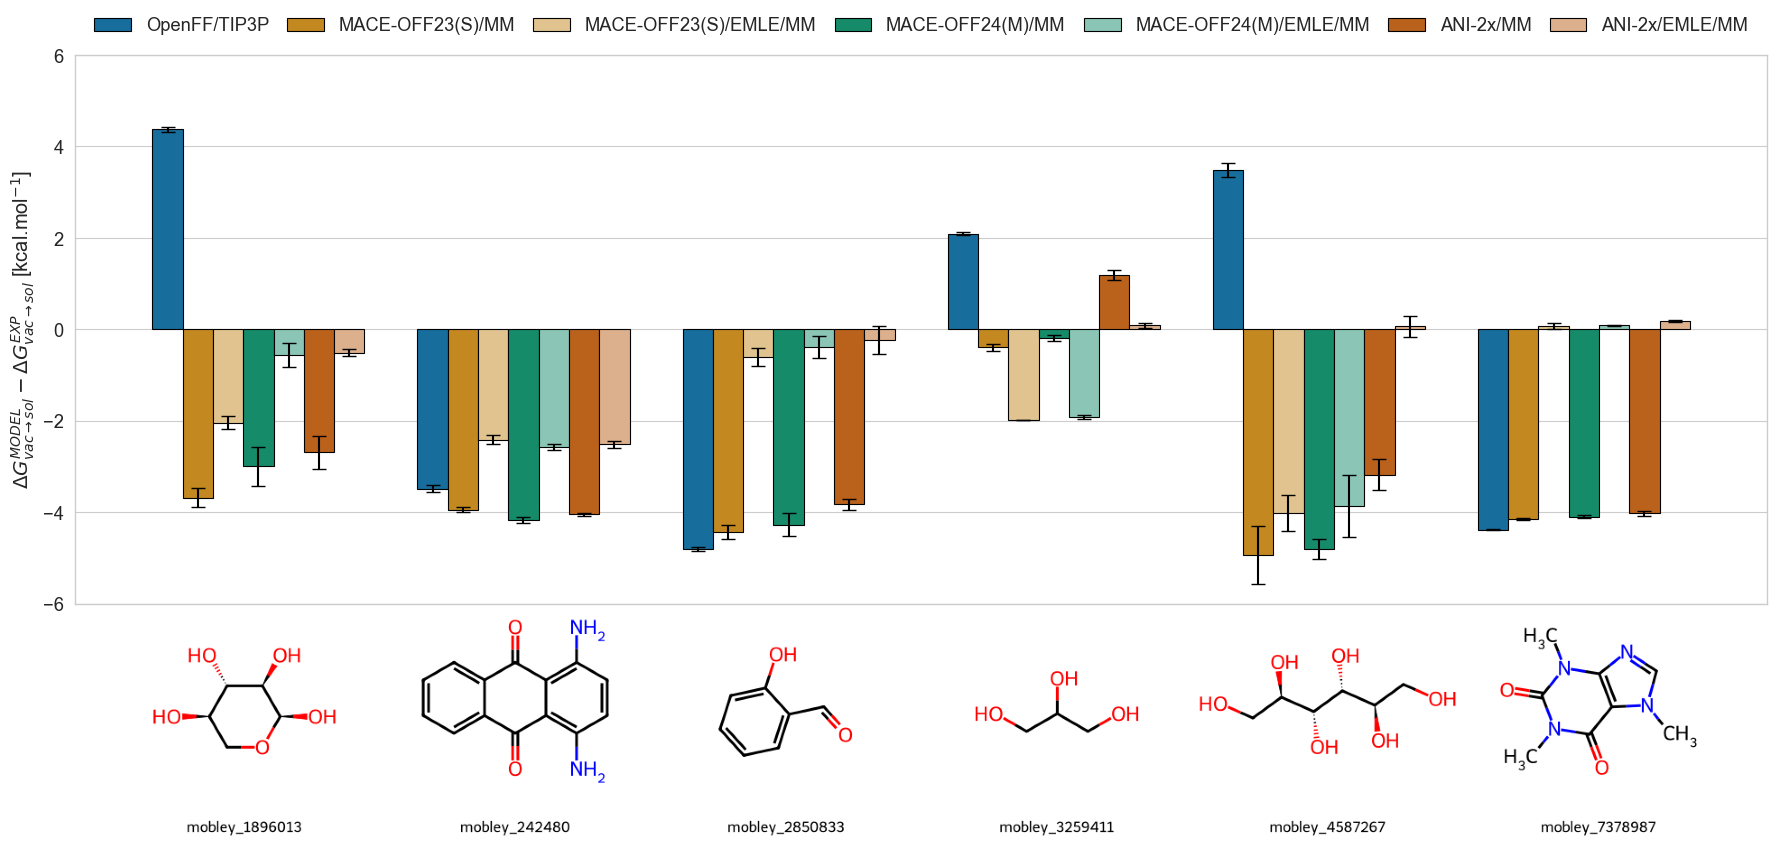

In [11]:
sns.set(style="whitegrid", palette="colorblind", context="paper", font_scale=1.5)
plt.figure(figsize=(18, 6))

# Plot
ax = sns.barplot(
    data=df_long_combined,
    x="Molecule",
    y="Mean",
    hue="Model",
    edgecolor="black",
    capsize=0.2,
    errcolor="black",
    errwidth=1.5,
    palette=palette,
)

error = df_long_combined["Error"].values
for i, bar in enumerate(ax.patches):
    if i < len(error):  # Add bounds check
        height = bar.get_height()
        x = bar.get_x() + bar.get_width() / 2
        err = error[i]
        ax.errorbar(
            x, height, yerr=err, ecolor="black", capsize=5, fmt="none", linewidth=1.5
        )

plt.ylabel(
    r"$\Delta G^{MODEL}_{vac \rightarrow sol}-\Delta G^{EXP}_{vac \rightarrow sol}$ [kcal.mol$^{-1}$]"
)
plt.xlabel("")
plt.xticks([])
plt.tight_layout()
plt.legend(
    frameon=False,
    loc="upper center",
    bbox_to_anchor=(0.5, 1.10),
    ncol=7,  # number of columns in the top row
    columnspacing=1.0,  # horizontal spacing between columns
)
ax.set_ylim(-6, 6)

png_data = io.BytesIO()
cairosvg.svg2png(url="molecules_grid.svg", write_to=png_data)
png_data.seek(0)
img = mpimg.imread(png_data)

# Add image below plot
imagebox = OffsetImage(img, zoom=0.65)  # adjust zoom
ab = AnnotationBbox(
    imagebox, (0.5, -0.20), xycoords="axes fraction", frameon=False, zorder=0
)
ax.add_artist(ab)

plt.savefig(
    "hfe_errors_transferable_dataset_eps_07.png",
    dpi=300,
    bbox_inches="tight",
    transparent=False,
)
plt.show()